In [3]:
# name: nataniel parievsky , mor markovich
import networkx as nx

file_path = 'data/airport-network.gml'
airport_network = nx.read_gml(file_path)

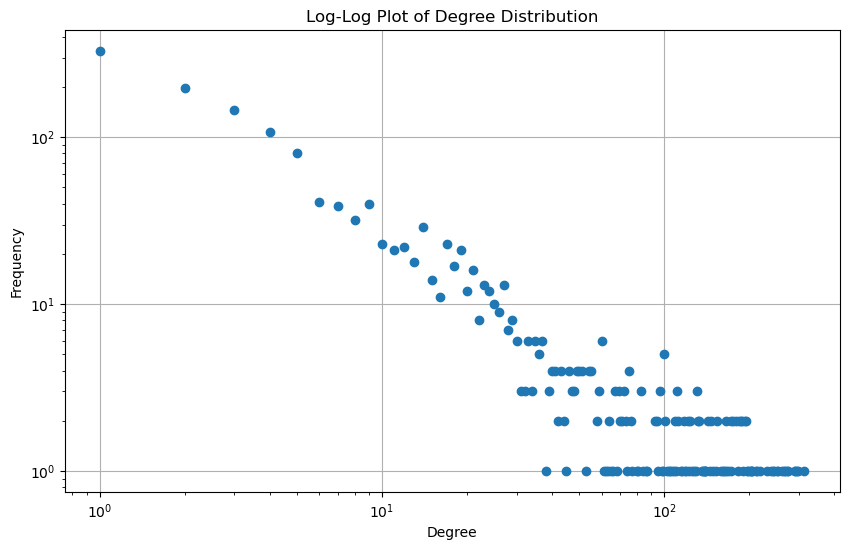

0.38414344664491556

In [4]:
import matplotlib.pyplot as plt
import numpy as np

degrees = [degree for node, degree in airport_network.degree()]
degree_counts = np.bincount(degrees)
degree = np.arange(len(degree_counts))

nonzero_indices = degree_counts > 0
degree = degree[nonzero_indices]
degree_counts = degree_counts[nonzero_indices]

plt.figure(figsize=(10, 6))
plt.loglog(degree, degree_counts, marker='o', linestyle='none')
plt.title('Log-Log Plot of Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

global_clustering_coefficient = nx.transitivity(airport_network)
global_clustering_coefficient

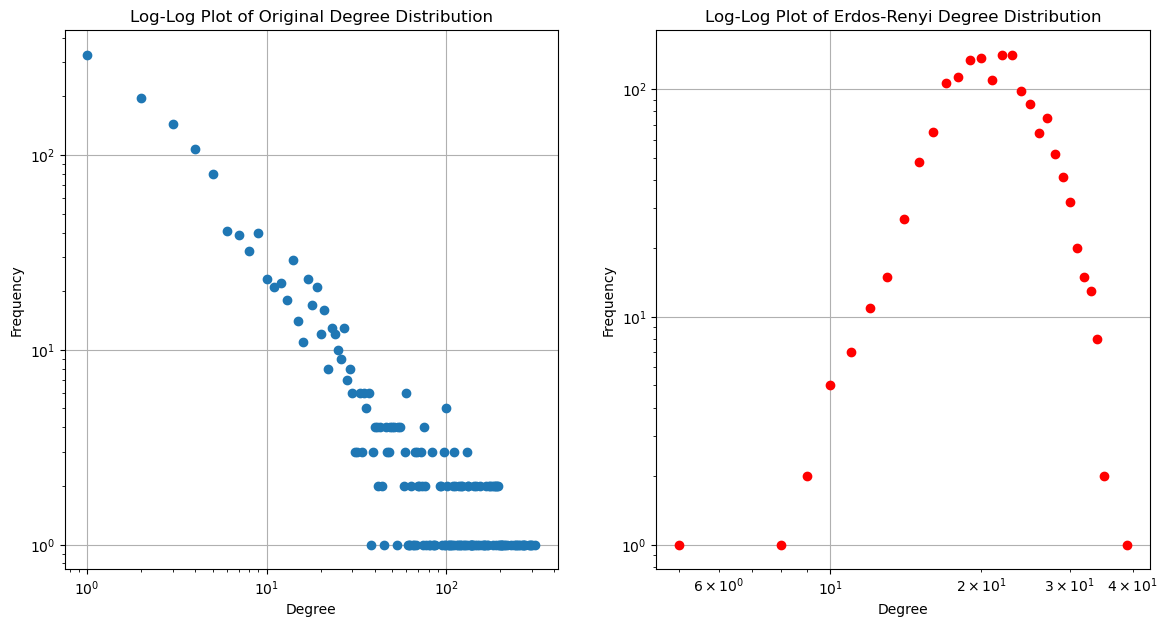

In [5]:
N = airport_network.number_of_nodes()
M = airport_network.number_of_edges()

average_degree = 2 * M / N

p = average_degree / (N - 1)

erdos_renyi_graph = nx.erdos_renyi_graph(N, p)

er_degrees = [degree for node, degree in erdos_renyi_graph.degree()]
er_degree_counts = np.bincount(er_degrees)
er_degree = np.arange(len(er_degree_counts))

nonzero_indices_er = er_degree_counts > 0
er_degree = er_degree[nonzero_indices_er]
er_degree_counts = er_degree_counts[nonzero_indices_er]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.loglog(degree, degree_counts, marker='o', linestyle='none')
plt.title('Log-Log Plot of Original Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(er_degree, er_degree_counts, marker='o', linestyle='none', color='r')
plt.title('Log-Log Plot of Erdos-Renyi Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [6]:
degree_sequence = [degree for node, degree in airport_network.degree()]
configuration_model_graph = nx.configuration_model(degree_sequence)

configuration_model_graph = nx.Graph(configuration_model_graph)
configuration_model_graph.remove_edges_from(nx.selfloop_edges(configuration_model_graph))

config_model_clustering_coefficient = nx.transitivity(configuration_model_graph)

config_model_clustering_coefficient

0.1934600216695635

In [7]:
N = 6000
p = 0.0001

L = (N * (N - 1) / 2) * p
L

1799.7

In [8]:
# P * N = 0.0001 * 6000 = 0.6
# Since the average degree 0.6 is less than 1, the network is in the subcritical regime.

In [9]:
# To find the value of N that leads to an average degree K = 10 with the same probability P = 0.0001,
# we can use the relationship:
# K = P * (N - 1)
# K = 10, P = 0.0001
# 10 = 0.0001 * (N - 1)
# 10 = 0.0001N - 0.0001
# 10.0001 = 0.0001N
# N should be approximately 100001

In [10]:
# N must be even for the network to exist because each link is connected to two other nodes.
# The degree distribution is P(1) = 1 because K = 1.
# Each pair of nodes has one link, the number of components in the network is half the number of nodes:
# number of components is N / 2

In [11]:
# N can be any positive integer greater than or equal to 3 for this network to exist.
# The network looks like one or more disjoint cycles (ring networks) where each node is connected to two neighbors, forming a closed loop.
# Each of these cycles is isolated from the others if 𝑁 N is greater than the size of one cycle.